# **Análisis comparativo de las diferentes técnicas de representación de texto**

In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import re
import csv

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
from scipy import stats
!pip install pingouin
import pingouin as pg

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#**Paso 1: Cargar datos**

In [ ]:
from google.colab import files
import io

from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab Notebooks/Doctorado_Clases/NLP/TopTam'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Doctorado_Clases/NLP/TopTam


In [ ]:
df = pd.read_csv('df_embeddings_final.tsv', sep="\t")

In [ ]:
print(df)

                                                  text  class  \
0    The transfer shall take place in such a manner...      0   
1    The BE shall receive via MC State Count data p...      0   
2    This includes Lag Frame destination addresses ...      0   
3    Formatted Output The BE shall deliver formatte...      0   
4    The BE shall produce all data needed by the ee...      0   
..                                                 ...    ...   
544  Therefore any authorized user should be able t...      1   
545  meeting during office hours private activities...      1   
546  FLEXIBLE Rescheduling of a meeting should be d...      1   
547  Also the system should be flexible enough to a...      1   
548  the sets of concerned participants be varying ...      1   

                                                tokens  \
0    ['transfer', 'shall', 'take', 'place', 'manner...   
1    ['shall', 'receiv', 'via', 'mc', 'state', 'cou...   
2    ['includ', 'lag', 'frame', 'destin', 'ad

# **Paso 2: División de los datos de entrenamiento, validación y prueba**

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(351, 9)
(88, 9)
(110, 9)


In [ ]:
##Descomentar en caso de querer guardarlos
# train_df.to_csv('train_df.tsv', sep='\t', index=False)
# val_df.to_csv('val_df.tsv', sep='\t', index=False)
# test_df.to_csv('test_df.tsv', sep='\t', index=False)

### Datos de entrenamiento y prueba BOW

In [ ]:
X_train_bow = train_df['vectores_bow'].apply(lambda x: np.array(eval(x))).tolist()
y_train_bow = train_df['class'].to_list()

In [ ]:
X_val_bow = val_df['vectores_bow'].apply(lambda x: np.array(eval(x))).tolist()
y_val_bow = val_df['class'].to_list()

In [ ]:
X_test_bow = test_df['vectores_bow'].apply(lambda x: np.array(eval(x))).tolist()
y_test = test_df['class'].to_list()

### Datos de entrenamiento y prueba TF-IDF

In [ ]:
X_train_tfidf = train_df['tfidf'].apply(lambda x: np.array(eval(x))).tolist()
y_train_tfidf = train_df['class'].to_list()

In [ ]:
X_val_tfidf = val_df['tfidf'].apply(lambda x: np.array(eval(x))).tolist()
y_val_tfidf = val_df['class'].to_list()

In [ ]:
X_test_tfidf = test_df['tfidf'].apply(lambda x: np.array(eval(x))).tolist()

### Datos de entrenamiento y prueba Word2Vec (CBOW)

In [ ]:
X_train_cbow = train_df['cbow_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_train_cbow = train_df['class'].to_list()

In [ ]:
X_val_cbow = val_df['cbow_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_val_cbow = val_df['class'].to_list()

In [ ]:
X_test_cbow = test_df['cbow_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()


### Datos de entrenamiento y prueba Word2Vec (Skip-gram)

In [ ]:
X_train_skipgram = train_df['skipgram_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_train_skipgram = train_df['class'].to_list()

In [ ]:
X_val_skipgram = val_df['skipgram_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_val_skipgram = val_df['class'].to_list()

In [ ]:
X_test_skipgram = test_df['skipgram_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()


### Datos de entrenamiento y prueba FastText

In [ ]:
X_train_fasttext = train_df['fasttext_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_train_fasttext = train_df['class'].to_list()

In [ ]:
X_val_fasttext = val_df['fasttext_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_val_fasttext = val_df['class'].to_list()

In [ ]:
X_test_fasttext = test_df['fasttext_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()


### Datos de entrenamiento y prueba GloVe

In [ ]:
X_train_glove = train_df['glove_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_train_glove = train_df['class'].to_list()

In [ ]:
X_val_glove = val_df['glove_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

y_val_glove = val_df['class'].to_list()

In [ ]:
X_test_glove = test_df['glove_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()


# **Paso 3: Obtención los modelos**

*   BoW
*   TF-IDF
*   Word2Vec (CBOW)
*   Word2Vec (Skip-gram)
*   FastText
*   GloVe



### Modelo BoW

In [ ]:
model_bow = RandomForestClassifier(random_state=42)
model_bow.fit(X_train_bow, y_train_bow)
y_pred_bow = model_bow.predict(X_val_bow)
print(classification_report(y_val_bow, y_pred_bow))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        48
           1       0.70      0.93      0.80        40

    accuracy                           0.78        88
   macro avg       0.81      0.80      0.78        88
weighted avg       0.82      0.78      0.78        88



### Modelo TF-IDF

In [ ]:
model_tfidf = RandomForestClassifier(random_state=42)
model_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = model_tfidf.predict(X_val_tfidf)
print(classification_report(y_val_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74        48
           1       0.67      0.97      0.80        40

    accuracy                           0.77        88
   macro avg       0.82      0.79      0.77        88
weighted avg       0.83      0.77      0.77        88



### Modelo Word2Vec CBOW

In [ ]:
model_cbow = RandomForestClassifier(random_state=42)
model_cbow.fit(X_train_cbow, y_train_cbow)
y_pred_cbow = model_cbow.predict(X_val_cbow)
print(classification_report(y_val_cbow, y_pred_cbow))

              precision    recall  f1-score   support

           0       0.84      0.56      0.68        48
           1       0.62      0.88      0.73        40

    accuracy                           0.70        88
   macro avg       0.73      0.72      0.70        88
weighted avg       0.74      0.70      0.70        88



### Modelo Word2Vec Skipgram

In [ ]:
model_skipgram = RandomForestClassifier(random_state=42)
model_skipgram.fit(X_train_skipgram, y_train_skipgram)
y_pred_skipgram = model_skipgram.predict(X_val_skipgram)
print(classification_report(y_val_skipgram, y_pred_skipgram))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        48
           1       0.75      0.97      0.85        40

    accuracy                           0.84        88
   macro avg       0.86      0.85      0.84        88
weighted avg       0.87      0.84      0.84        88



### Modelo FastText

In [ ]:
model_fasttext = RandomForestClassifier(random_state=42)
model_fasttext.fit(X_train_fasttext, y_train_fasttext)
y_pred_fasttext = model_fasttext.predict(X_val_fasttext)
print(classification_report(y_val_fasttext, y_pred_fasttext))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85        48
           1       0.76      0.97      0.86        40

    accuracy                           0.85        88
   macro avg       0.87      0.86      0.85        88
weighted avg       0.88      0.85      0.85        88



### Modelo GloVe

In [ ]:
model_glove = RandomForestClassifier(random_state=42)
model_glove.fit(X_train_glove, y_train_glove)
y_pred_glove = model_glove.predict(X_val_glove)
print(classification_report(y_val_glove, y_pred_glove))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        48
           1       0.62      0.85      0.72        40

    accuracy                           0.69        88
   macro avg       0.72      0.71      0.69        88
weighted avg       0.73      0.69      0.69        88



# **Paso 4: Predicción con el modelo**

In [ ]:
test_metrics_precision_bow = []
test_metrics_recall_bow = []
test_metrics_f1_score_bow = []
test_metrics_accuracy_bow = []

test_metrics_precision_tfidf = []
test_metrics_recall_tfidf = []
test_metrics_f1_score_tfidf = []
test_metrics_accuracy_tfidf = []

test_metrics_precision_cbow = []
test_metrics_recall_cbow = []
test_metrics_f1_score_cbow = []
test_metrics_accuracy_cbow = []

test_metrics_precision_skipgram = []
test_metrics_recall_skipgram = []
test_metrics_f1_score_skipgram = []
test_metrics_accuracy_skipgram = []

test_metrics_precision_fasttext = []
test_metrics_recall_fasttext = []
test_metrics_f1_score_fasttext = []
test_metrics_accuracy_fasttext = []

test_metrics_precision_glove = []
test_metrics_recall_glove = []
test_metrics_f1_score_glove = []
test_metrics_accuracy_glove = []

for i in range(100):
  df_sample = test_df.sample(31)
  #bow
  X_test_bow = df_sample['vectores_bow'].apply(lambda x: np.array(eval(x))).tolist()
  y_test_bow = df_sample['class'].to_list()
  y_pred_bow = model_bow.predict(X_test_bow)
  precision_bow = classification_report(y_test_bow, y_pred_bow, output_dict=True)['weighted avg']['precision']
  recall_bow = classification_report(y_test_bow, y_pred_bow, output_dict=True)['weighted avg']['recall']
  f1_score_bow = classification_report(y_test_bow, y_pred_bow, output_dict=True)['weighted avg']['f1-score']
  accuracy_bow = classification_report(y_test_bow, y_pred_bow, output_dict=True)['accuracy']
  test_metrics_precision_bow.append(precision_bow)
  test_metrics_recall_bow.append(recall_bow)
  test_metrics_f1_score_bow.append(f1_score_bow)
  test_metrics_accuracy_bow.append(accuracy_bow)

  #tfidf
  X_test_tfidf = df_sample['tfidf'].apply(lambda x: np.array(eval(x))).tolist()
  y_test_tfidf = df_sample['class'].to_list()
  y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
  precision_tfidf = classification_report(y_test_tfidf, y_pred_tfidf, output_dict=True)['weighted avg']['precision']
  recall_tfidf = classification_report(y_test_tfidf, y_pred_tfidf, output_dict=True)['weighted avg']['recall']
  f1_score_tfidf = classification_report(y_test_tfidf, y_pred_tfidf, output_dict=True)['weighted avg']['f1-score']
  accuracy_tfidf = classification_report(y_test_tfidf, y_pred_tfidf, output_dict=True)['accuracy']
  test_metrics_precision_tfidf.append(precision_tfidf)
  test_metrics_recall_tfidf.append(recall_tfidf)
  test_metrics_f1_score_tfidf.append(f1_score_tfidf)
  test_metrics_accuracy_tfidf.append(accuracy_tfidf)

  #cbow
  X_test_cbow = df_sample['cbow_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

  y_test_cbow = df_sample['class'].to_list()
  y_pred_cbow = model_cbow.predict(X_test_cbow)
  precision_cbow = classification_report(y_test_cbow, y_pred_cbow, output_dict=True)['weighted avg']['precision']
  recall_cbow = classification_report(y_test_cbow, y_pred_cbow, output_dict=True)['weighted avg']['recall']
  f1_score_cbow = classification_report(y_test_cbow, y_pred_cbow, output_dict=True)['weighted avg']['f1-score']
  accuracy_cbow = classification_report(y_test_cbow, y_pred_cbow, output_dict=True)['accuracy']
  test_metrics_precision_cbow.append(precision_cbow)
  test_metrics_recall_cbow.append(recall_cbow)
  test_metrics_f1_score_cbow.append(f1_score_cbow)
  test_metrics_accuracy_cbow.append(accuracy_cbow)

  #skipgram
  X_test_skipgram = df_sample['skipgram_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

  y_test_skipgram = df_sample['class'].to_list()
  y_pred_skipgram = model_skipgram.predict(X_test_skipgram)
  precision_skipgram = classification_report(y_test_skipgram, y_pred_skipgram, output_dict=True)['weighted avg']['precision']
  recall_skipgram = classification_report(y_test_skipgram, y_pred_skipgram, output_dict=True)['weighted avg']['recall']
  f1_score_skipgram = classification_report(y_test_skipgram, y_pred_skipgram, output_dict=True)['weighted avg']['f1-score']
  accuracy_skipgram = classification_report(y_test_skipgram, y_pred_skipgram, output_dict=True)['accuracy']
  test_metrics_precision_skipgram.append(precision_skipgram)
  test_metrics_recall_skipgram.append(recall_skipgram)
  test_metrics_f1_score_skipgram.append(f1_score_skipgram)
  test_metrics_accuracy_skipgram.append(accuracy_skipgram)

  #fasttext
  X_test_fasttext = df_sample['fasttext_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

  y_test_fasttext = df_sample['class'].to_list()
  y_pred_fasttext = model_fasttext.predict(X_test_fasttext)
  precision_fasttext = classification_report(y_test_fasttext, y_pred_fasttext, output_dict=True)['weighted avg']['precision']
  recall_fasttext = classification_report(y_test_fasttext, y_pred_fasttext, output_dict=True)['weighted avg']['recall']
  f1_score_fasttext = classification_report(y_test_fasttext, y_pred_fasttext, output_dict=True)['weighted avg']['f1-score']
  accuracy_fasttext = classification_report(y_test_fasttext, y_pred_fasttext, output_dict=True)['accuracy']
  test_metrics_precision_fasttext.append(precision_fasttext)
  test_metrics_recall_fasttext.append(recall_fasttext)
  test_metrics_f1_score_fasttext.append(f1_score_fasttext)
  test_metrics_accuracy_fasttext.append(accuracy_fasttext)


  #glove
  X_test_glove = df_sample['glove_embedding'].apply(
    lambda x: np.array(x.strip("[]").split(), dtype=float)
).tolist()

  y_test_glove = df_sample['class'].to_list()
  y_pred_glove = model_glove.predict(X_test_glove)
  precision_glove = classification_report(y_test_glove, y_pred_glove, output_dict=True)['weighted avg']['precision']
  recall_glove = classification_report(y_test_glove, y_pred_glove, output_dict=True)['weighted avg']['recall']
  f1_score_glove = classification_report(y_test_glove, y_pred_glove, output_dict=True)['weighted avg']['f1-score']
  accuracy_glove = classification_report(y_test_glove, y_pred_glove, output_dict=True)['accuracy']
  test_metrics_precision_glove.append(precision_glove)
  test_metrics_recall_glove.append(recall_glove)
  test_metrics_f1_score_glove.append(f1_score_glove)
  test_metrics_accuracy_glove.append(accuracy_glove)


metrics = {
    #bow
    'precision_bow': test_metrics_precision_bow,
    'recall_bow': test_metrics_recall_bow,
    'f1_score_bow': test_metrics_f1_score_bow,
    'accuracy_bow': test_metrics_accuracy_bow,
     #tfidf
    'precision_tfidf': test_metrics_precision_tfidf,
    'recall_tfidf': test_metrics_recall_tfidf,
    'f1_score_tfidf': test_metrics_f1_score_tfidf,
    'accuracy_tfidf': test_metrics_accuracy_tfidf,
    # w2v cbow
    'precision_cbow': test_metrics_precision_cbow,
    'recall_cbow': test_metrics_recall_cbow,
    'f1_score_cbow': test_metrics_f1_score_cbow,
    'accuracy_cbow': test_metrics_accuracy_cbow,
    #w2v skipgram
    'precision_skipgram': test_metrics_precision_skipgram,
    'recall_skipgram': test_metrics_recall_skipgram,
    'f1_score_skipgram': test_metrics_f1_score_skipgram,
    'accuracy_skipgram': test_metrics_accuracy_skipgram,
    #fasttext
    'precision_fasttext': test_metrics_precision_fasttext,
    'recall_fasttext': test_metrics_recall_fasttext,
    'f1_score_fasttext': test_metrics_f1_score_fasttext,
    'accuracy_fasttext': test_metrics_accuracy_fasttext,
    #glove
    'precision_glove': test_metrics_precision_glove,
    'recall_glove': test_metrics_recall_glove,
    'f1_score_glove': test_metrics_f1_score_glove,
    'accuracy': test_metrics_accuracy_glove

}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

    precision_bow  recall_bow  f1_score_bow  accuracy_bow  precision_tfidf  \
0        0.851019    0.838710      0.836662      0.838710         0.782014   
1        0.878763    0.870968      0.871237      0.870968         0.920304   
2        0.876758    0.870968      0.870155      0.870968         0.877112   
3        0.901328    0.870968      0.871505      0.870968         0.867572   
4        0.851019    0.838710      0.836662      0.838710         0.804147   
..            ...         ...           ...           ...              ...   
95       0.895545    0.870968      0.867006      0.870968         0.800261   
96       0.905511    0.903226      0.903428      0.903226         0.899642   
97       0.810753    0.806452      0.790673      0.806452         0.779156   
98       0.874780    0.870968      0.868987      0.870968         0.874780   
99       0.819599    0.774194      0.776553      0.774194         0.802316   

    recall_tfidf  f1_score_tfidf  accuracy_tfidf  precision_cbo

In [ ]:
descriptions = df_metrics.describe()
descriptions.to_csv('test_metrics_descriptions.tsv', sep='\t')

In [ ]:
print(df_metrics.describe())

       precision_bow  recall_bow  f1_score_bow  accuracy_bow  precision_tfidf  \
count     100.000000  100.000000    100.000000    100.000000       100.000000   
mean        0.876857    0.862903      0.861059      0.862903         0.869009   
std         0.047902    0.052352      0.053820      0.052352         0.044850   
min         0.752995    0.741935      0.730051      0.741935         0.733995   
25%         0.844351    0.838710      0.835502      0.838710         0.848817   
50%         0.878763    0.870968      0.868328      0.870968         0.877112   
75%         0.904032    0.903226      0.902023      0.903226         0.896774   
max         0.970430    0.967742      0.968030      0.967742         0.969278   

       recall_tfidf  f1_score_tfidf  accuracy_tfidf  precision_cbow  \
count    100.000000      100.000000      100.000000      100.000000   
mean       0.837742        0.832891        0.837742        0.713968   
std        0.056239        0.059492        0.056239      

In [ ]:
##Descomentar si se quieren guardar las métricas de evaluación
df_metrics.to_csv('test_metrics_final.tsv', sep='\t', index=False)

# **Paso 4 : Visualización de todas las métricas de evaluación**



In [ ]:
precision = df_metrics.filter(regex='precision')
recall = df_metrics.filter(regex='recall')
f1_score = df_metrics.filter(regex='f1_score')
accuracy = df_metrics.filter(regex='accuracy')

In [ ]:
def plot_boxplot(df, columns, title="Metrics", colors=None, labels=None):
    data = df[columns].dropna()

    if colors is None:
        colors = sns.color_palette("pastel", len(columns))

    if labels is None:
        labels = columns
        # print(labels)

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, palette=colors)

    # Replace column names with custom labels
    plt.xticks(ticks=range(len(labels)), labels=labels, fontsize=12)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.ylabel("Values", fontsize=14)
    plt.xlabel("", fontsize=14)

    # Style the plot
    sns.despine()
    plt.tight_layout()
    plt.savefig(f'{title}.pdf')
    plt.show()


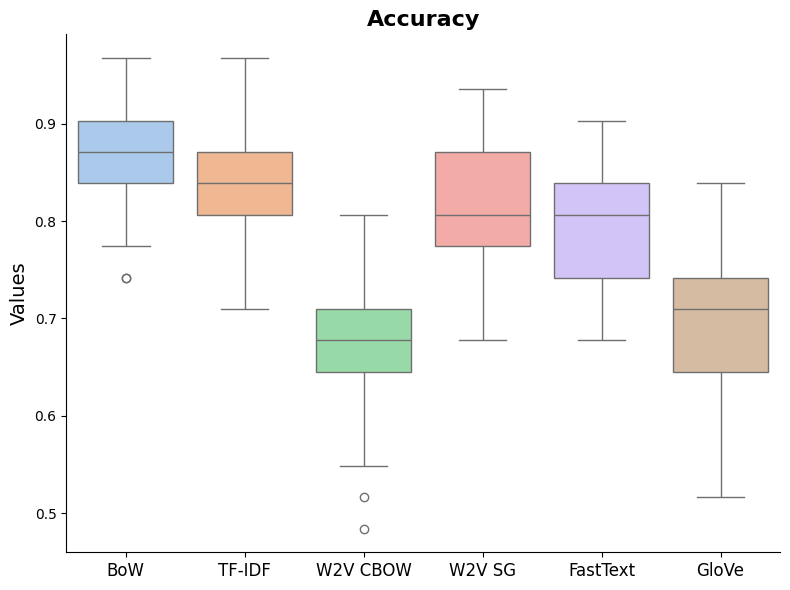

In [ ]:
custom_labels = ['BoW','TF-IDF', 'W2V CBOW', 'W2V SG', 'FastText', 'GloVe']
plot_boxplot(df_metrics, ['accuracy_bow', 'accuracy_tfidf', 'accuracy_cbow', 'accuracy_skipgram', 'accuracy_fasttext', 'accuracy' ], title=f"Accuracy", labels=custom_labels)

In [ ]:
print(precision.columns)

Index(['precision_bow', 'precision_tfidf', 'precision_cbow',
       'precision_skipgram', 'precision_fasttext', 'precision_glove'],
      dtype='object')


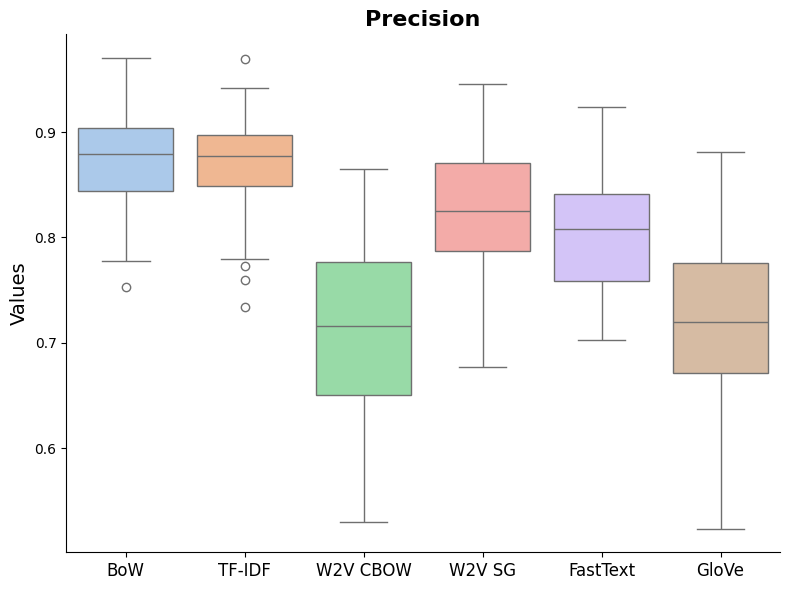

In [ ]:
custom_labels = ['BoW','TF-IDF', 'W2V CBOW', 'W2V SG', 'FastText', 'GloVe']
plot_boxplot(df_metrics, ['precision_bow', 'precision_tfidf', 'precision_cbow', 'precision_skipgram', 'precision_fasttext', 'precision_glove' ], title=f"Precision", labels=custom_labels)

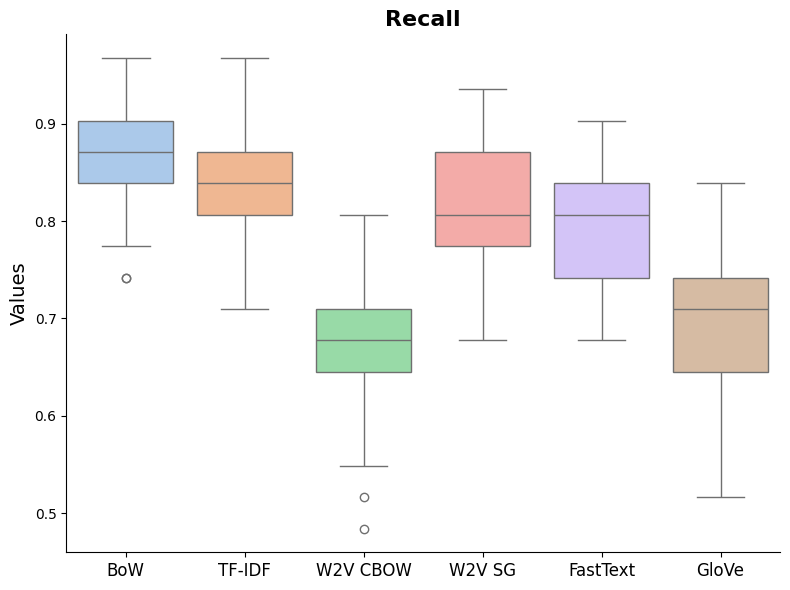

In [ ]:
custom_labels = ['BoW','TF-IDF', 'W2V CBOW', 'W2V SG', 'FastText', 'GloVe']
plot_boxplot(df_metrics, ['recall_bow', 'recall_tfidf', 'recall_cbow', 'recall_skipgram', 'recall_fasttext', 'recall_glove'], title=f"Recall", labels=custom_labels)

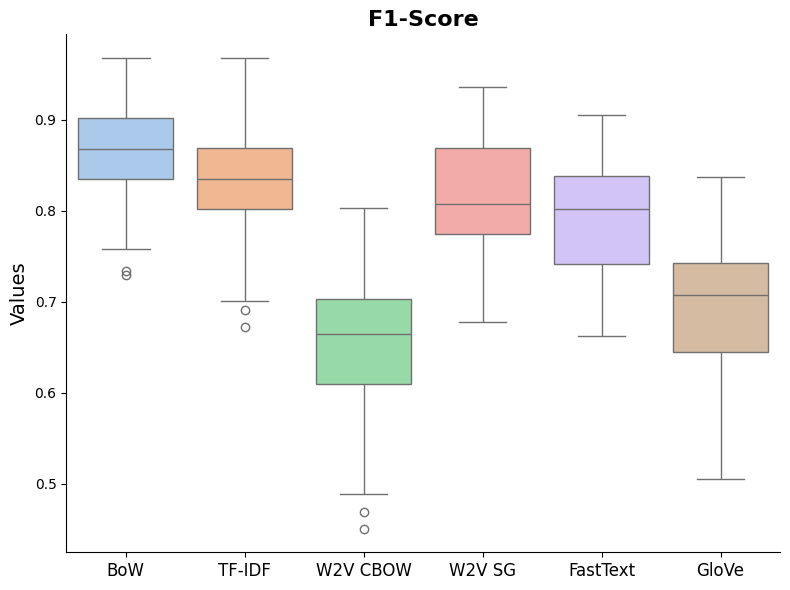

In [ ]:
custom_labels = ['BoW','TF-IDF', 'W2V CBOW', 'W2V SG', 'FastText', 'GloVe']
plot_boxplot(df_metrics, ['f1_score_bow', 'f1_score_tfidf', 'f1_score_cbow', 'f1_score_skipgram', 'f1_score_fasttext', 'f1_score_glove' ], title=f"F1-Score", labels=custom_labels)

# **Paso 5: Pruebas de hipótesis**

### **Dunnet**

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

columnas_f1 = ['f1_score_bow','f1_score_tfidf', 'f1_score_cbow', 'f1_score_skipgram', 'f1_score_fasttext', 'f1_score_glove'] #

f1_scores = np.concatenate([df_metrics[col].values for col in columnas_f1])
tecnicas = sum([[col.replace('f1_score','')]*len(df_metrics) for col in columnas_f1], [])

df_long = pd.DataFrame({'tecnica': tecnicas, 'f1_score': f1_scores})

# Técnica de referencia (la que obtuvo mejor F1)
referencia = 'f1_score_bow'

# Comparaciones múltiples usando Tukey HSD como aproximación a Dunnett
mc_comparison = MultiComparison(df_long['f1_score'], df_long['tecnica'])
tukey_result = mc_comparison.tukeyhsd()

# Mostrar todas las comparaciones
print(tukey_result.summary())

# Filtrar solo las comparaciones que involucran la técnica de referencia
comparaciones_referencia = [row for row in tukey_result._results_table.data[1:] if referencia in row[0]]
for row in comparaciones_referencia:
    print(row)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
     _bow     _cbow   -0.203    0.0 -0.2286 -0.1774   True
     _bow _fasttext  -0.0682    0.0 -0.0939 -0.0426   True
     _bow    _glove  -0.1606    0.0 -0.1862  -0.135   True
     _bow _skipgram  -0.0439    0.0 -0.0695 -0.0182   True
     _bow    _tfidf  -0.0282 0.0217 -0.0538 -0.0025   True
    _cbow _fasttext   0.1348    0.0  0.1092  0.1604   True
    _cbow    _glove   0.0424    0.0  0.0168  0.0681   True
    _cbow _skipgram   0.1591    0.0  0.1335  0.1848   True
    _cbow    _tfidf   0.1748    0.0  0.1492  0.2005   True
_fasttext    _glove  -0.0924    0.0  -0.118 -0.0667   True
_fasttext _skipgram   0.0244 0.0734 -0.0013    0.05  False
_fasttext    _tfidf   0.0401 0.0001  0.0144  0.0657   True
   _glove _skipgram   0.1167    0.0  0.0911  0.1423   True
   _glove    _tfidf   0.1324    0.0  0.1068   0.158   Tr

## Intervalos de confianza

In [ ]:
def confidence_interval(mean, std, n):
  confidence = 0.95
  alpha = 1 - confidence
  se = std / np.sqrt(n)
  # Z value for 95%
  z = stats.norm.ppf(1 - alpha / 2)
  # confidence interval
  lower = mean - z * se
  upper = mean + z * se
  print(f"Intervalo de confianza del 95%: [{lower:.4f}, {upper:.4f}]")
  return lower, upper

In [ ]:
bow = confidence_interval(df_metrics['f1_score_bow'].mean(), df_metrics['f1_score_bow'].std(), 100)
tfidf = confidence_interval(df_metrics['f1_score_tfidf'].mean(), df_metrics['f1_score_tfidf'].std(), 100)
cbow = confidence_interval(df_metrics['f1_score_cbow'].mean(), df_metrics['f1_score_cbow'].std(), 100)
skipgram = confidence_interval(df_metrics['f1_score_skipgram'].mean(), df_metrics['f1_score_skipgram'].std(), 100)
fasttext = confidence_interval(df_metrics['f1_score_fasttext'].mean(), df_metrics['f1_score_fasttext'].std(), 100)
glove = confidence_interval(df_metrics['f1_score_glove'].mean(), df_metrics['f1_score_glove'].std(), 100)

Intervalo de confianza del 95%: [0.8505, 0.8716]
Intervalo de confianza del 95%: [0.8212, 0.8446]
Intervalo de confianza del 95%: [0.6429, 0.6732]
Intervalo de confianza del 95%: [0.8058, 0.8285]
Intervalo de confianza del 95%: [0.7818, 0.8039]
Intervalo de confianza del 95%: [0.6864, 0.7146]
